In [14]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

data = []
with open('vehicles.csv', 'r', encoding='utf-8') as file:
    reader = csv.reader(file)
    for row in reader:
        data.append(row)

df = pd.DataFrame(data[1:], columns=data[0])

df.shape
df.head()
df.columns


Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [15]:

df.nunique(axis=0)
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f') if isinstance(x, (int, float)) else x))
df['condition'].unique()

array(['', 'good', 'excellent', 'fair', 'like new', 'new', 'salvage'],
      dtype=object)

In [7]:

# Reclassify condition column
def clean_condition(row):
    good = ['good', 'fair']
    excellent = ['excellent', 'like new']

    if row['condition'] in good:
        return 'good'
    if row['condition'] in excellent:
        return 'excellent'
    return row['condition']

In [8]:
# Clean dataframe
def clean_df(df):
    df_cleaned = df.copy()
    df_cleaned['condition'] = df_cleaned.apply(clean_condition, axis=1)
    return df_cleaned

In [9]:
# Get df with reclassified 'condition' column
df_cleaned = clean_df(df)
df_cleaned['condition'].unique()

df_cleaned = df_cleaned.drop(['url', 'image_url', 'region_url'], axis=1)
NA_val = df_cleaned.isna().sum()

def na_filter(na, threshold=0.4):
    col_pass = []
    for i in na.keys():
        if na[i] / df_cleaned.shape[0] < threshold:
            col_pass.append(i)
    return df_cleaned[col_pass]

df_cleaned = na_filter(NA_val)
df_cleaned.columns
df_cleaned['price'] = pd.to_numeric(df_cleaned['price'], errors='coerce')
df_cleaned['year'] = pd.to_numeric(df_cleaned['year'], errors='coerce')
df_cleaned['odometer'] = pd.to_numeric(df_cleaned['odometer'], errors='coerce')

df_cleaned = df_cleaned[df_cleaned['price'].between(999.99, 99999.00, inclusive=True)]
df_cleaned = df_cleaned[df_cleaned['year'] > 1990]
df_cleaned = df_cleaned[df_cleaned['odometer'] < 899999.00]
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f') if isinstance(x, (int, float)) else x))

df_cleaned = df_cleaned.dropna(axis=0)
df_cleaned.shape


<ipython-input-9-da934773a59d>:21: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df_cleaned = df_cleaned[df_cleaned['price'].between(999.99, 99999.00, inclusive=True)]


(120028, 23)

<ipython-input-10-a5cae4be5554>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_cleaned.corr()


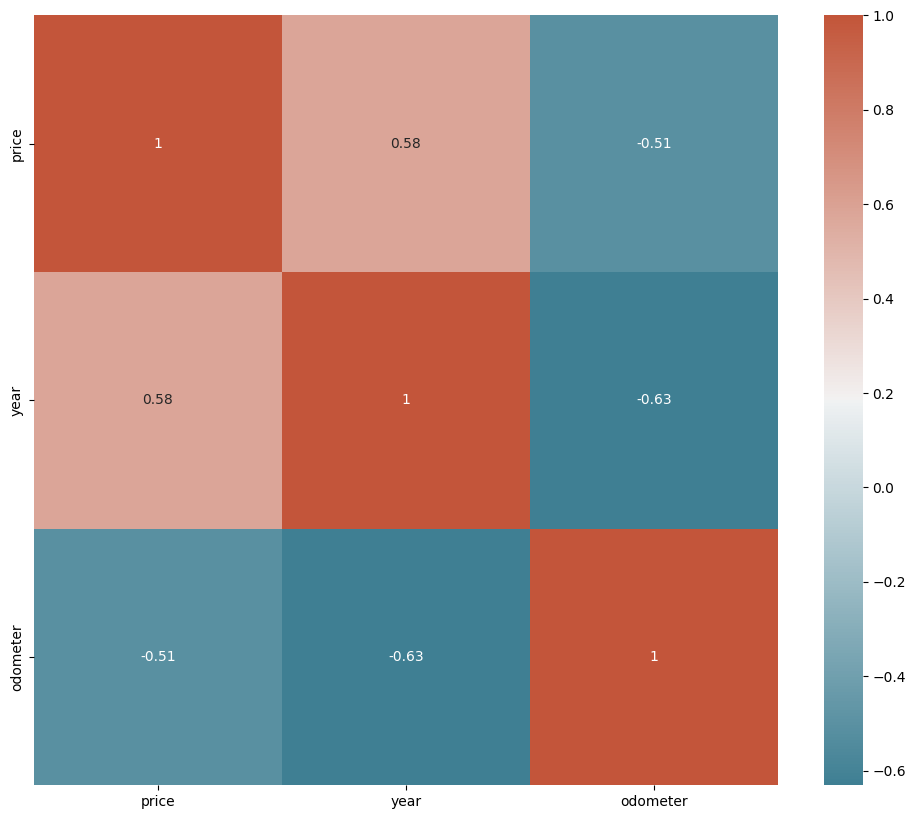

In [10]:
corr = df_cleaned.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.show()


<Axes: xlabel='odometer', ylabel='price'>

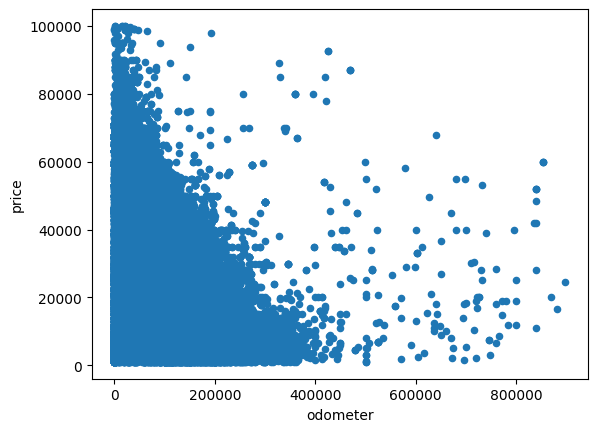

In [11]:
df_cleaned.plot(kind='scatter', x='odometer', y='price')

<Axes: xlabel='year', ylabel='price'>

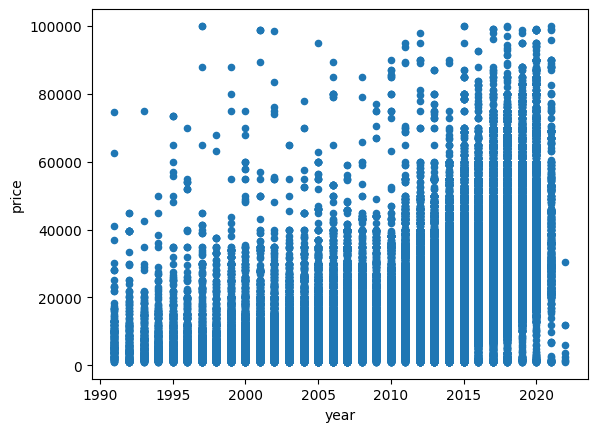

In [12]:
df_cleaned.plot(kind='scatter', x='year', y='price')

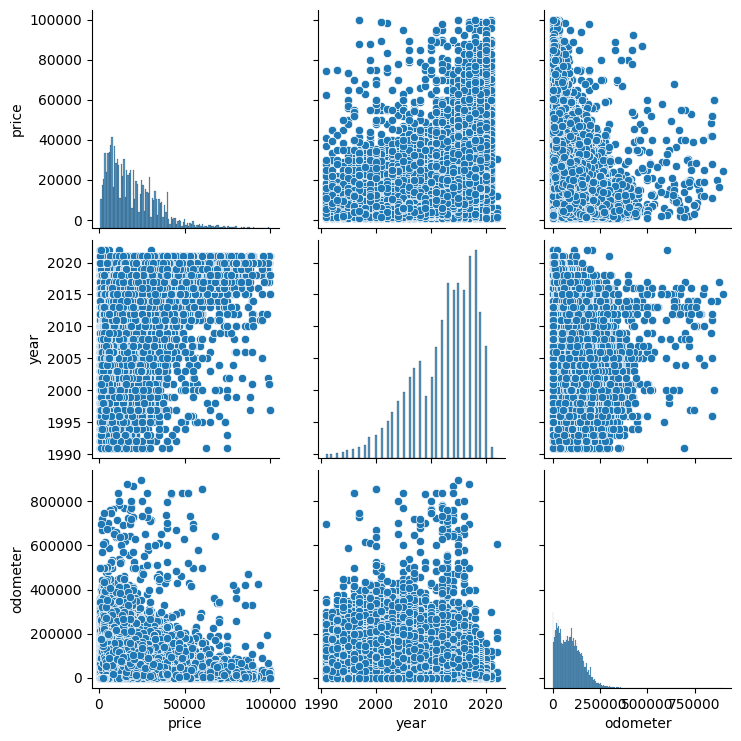

In [13]:
sns.pairplot(df_cleaned)